<a href="https://colab.research.google.com/github/AcerPing/AceTibaMe/blob/master/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
#((x_train,y_train),(x_test,y_test))
(x_train,y_train),(x_test,y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
trans = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

ans: Ankle boot


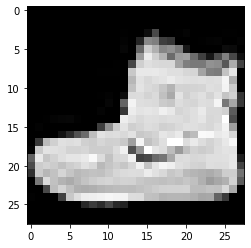

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
idx=0
print("ans:",trans[y_train[idx]])
plt.imshow(x_train[idx],cmap="gray")


In [5]:
import pandas as pd
pd.DataFrame(x_train[idx])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [#784*128+128(bias)
      Dense(128,activation="relu",input_dim=784),
      #128*10+10(bias)
      Dense(10,activation="softmax")]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# SparseCategoricalCrossentropy 會幫我做完One-Hot-Encoding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
# CategoricalCrossentropy() → 與正確率差多少(類似於MSE)
# optimizer=Adam() → 步長優化
# metrics=["accuracy"] → 得知正確率多少
model.compile(loss=SparseCategoricalCrossentropy(),
          optimizer=Adam(),
          metrics=["accuracy"])

In [8]:
# from tensorflow.keras.utils import to_categorical
# y_train_cat = to_categorical(y_train,num_classes=10)
# y_test_cat = to_categorical(y_test,num_classes=10)
# print(y_train[0])
# print(y_train_cat[0])

In [9]:
x_train_norm = x_train.reshape(-1,784)/255
x_test_norm = x_test.reshape(-1,784)/255


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
save_callback = ModelCheckpoint("mnist.h5",save_best_only=True)
stop_callback = EarlyStopping(patience=5,restore_best_weights=True)
#batch_size:看幾筆再做一次梯度(平均)下降[20-200]
#validation_split:切出一部份資料來驗證模型好壞
#epoch:整份資料要看幾輪
#verbose:2不要進度條
model.fit(x_train_norm,
      y_train,
      batch_size=200,
      validation_split=0.1,
      epochs=50,
      verbose=2,
      callbacks=[stop_callback,save_callback])

Epoch 1/50
270/270 - 1s - loss: 0.5916 - accuracy: 0.8000 - val_loss: 0.4300 - val_accuracy: 0.8468
Epoch 2/50
270/270 - 1s - loss: 0.4201 - accuracy: 0.8554 - val_loss: 0.4125 - val_accuracy: 0.8493
Epoch 3/50
270/270 - 1s - loss: 0.3787 - accuracy: 0.8671 - val_loss: 0.3663 - val_accuracy: 0.8688
Epoch 4/50
270/270 - 1s - loss: 0.3513 - accuracy: 0.8761 - val_loss: 0.3672 - val_accuracy: 0.8648
Epoch 5/50
270/270 - 1s - loss: 0.3326 - accuracy: 0.8825 - val_loss: 0.3486 - val_accuracy: 0.8722
Epoch 6/50
270/270 - 1s - loss: 0.3160 - accuracy: 0.8864 - val_loss: 0.3435 - val_accuracy: 0.8728
Epoch 7/50
270/270 - 1s - loss: 0.3051 - accuracy: 0.8895 - val_loss: 0.3344 - val_accuracy: 0.8763
Epoch 8/50
270/270 - 1s - loss: 0.2935 - accuracy: 0.8934 - val_loss: 0.3253 - val_accuracy: 0.8800
Epoch 9/50
270/270 - 1s - loss: 0.2856 - accuracy: 0.8967 - val_loss: 0.3379 - val_accuracy: 0.8785
Epoch 10/50
270/270 - 1s - loss: 0.2737 - accuracy: 0.9011 - val_loss: 0.3245 - val_accuracy: 0.8848

In [11]:
model.evaluate(x_test_norm,y_test)
# y_test_cat

313/313 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8819


[0.33508214354515076, 0.8819000124931335]

In [12]:
# # model.save("mlp.h5")
# # HDFView
# from tensorflow.keras.models import  load_model
# loaded = load_model("mnist.h5")
# #不需要:compile 可以:fit/evaluate/predict
# loaded.evaluate(x_test_norm,y_test_cat)

In [13]:
#sklearn:predict(預測類別) predict_proba(預測機率)
#tensorflow: predict_classes(預測類別) predict(預測機率)
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 5])

In [14]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,pre),
      index=["{}(真實)".format(i) for i in trans],
      columns=["{}(預測)".format(i) for i in trans])

,T-shirt/top(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Ankle boot(預測)
T-shirt/top(真實),851,2,13,16,4,0,107,1,6,0
Trouser(真實),4,968,0,22,3,0,3,0,0,0
Pullover(真實),22,0,825,11,69,0,71,0,2,0
Dress(真實),34,7,12,882,30,0,31,0,4,0
Coat(真實),0,1,101,24,792,0,79,0,3,0
Sandal(真實),0,0,0,1,0,949,0,32,2,16
Shirt(真實),142,1,85,24,54,0,686,0,8,0
Sneaker(真實),0,0,0,0,0,12,0,968,1,19
Bag(真實),9,0,9,4,4,2,7,4,961,0
Ankle boot(真實),0,0,0,0,0,3,1,59,0,937


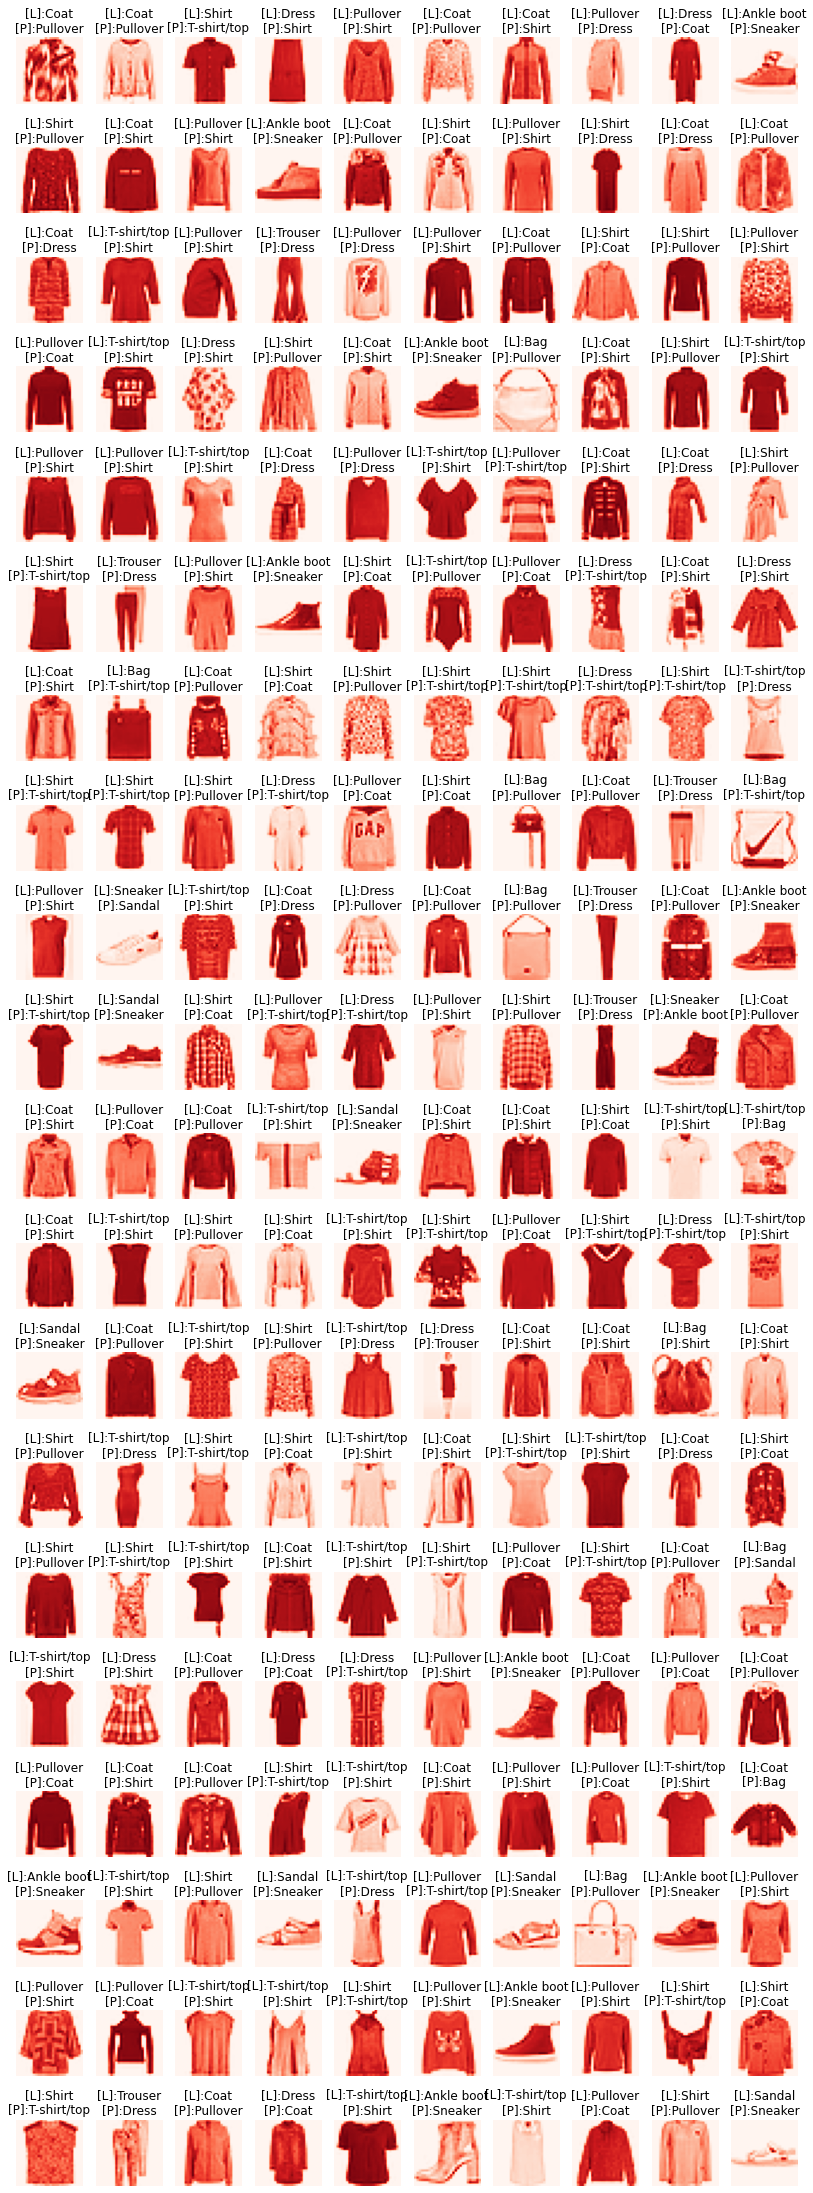

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,42))
idx = np.nonzero(pre != y_test)[0][:200]
# false_img = x_test[idx]
# false_label = y_test[idx]
# false_pre = pre[idx]
width = 10
height = len(idx)//width+1
for i,d in enumerate(idx):
  img,label,p = x_test[d],trans[y_test[d]],trans[pre[d]]
  t = "[L]:{}\n[P]:{}".format(label,p)
  plt.subplot(height,width,i+1)
  plt.title(t)
  plt.axis("off")
  plt.imshow(img,cmap="Reds")

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
fn = input("檔名:")
img = load_img(fn,target_size=(28,28)).convert("L")
img_np = np.array(img).reshape(1,784) / 255
pre = model.predict(img_np)[0]
pre.shape
for i in range(10):
  print(trans[i],"的機率:",round(pre[i],2))
plt.imshow(np.array(img),cmap="Reds")